<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


### Load Data From CSV File


In [4]:
df = pd.read_csv('loan_train.csv')
df.head(30)

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [ ]:
df.shape

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [ ]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

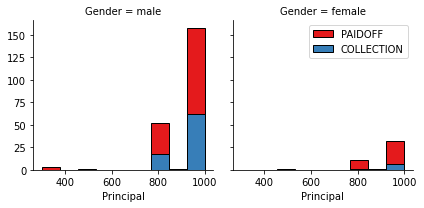

In [7]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

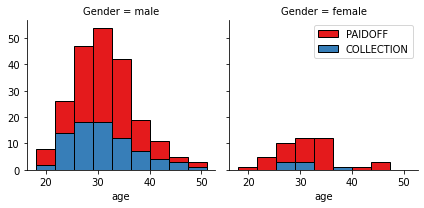

In [8]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


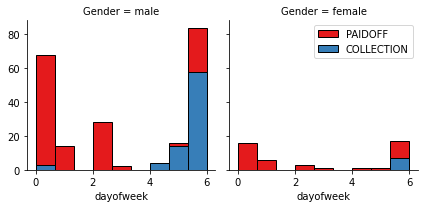

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [ ]:
df[['Principal','terms','age','Gender','education']].head()

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [14]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [15]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [16]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

(array([260.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  86.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

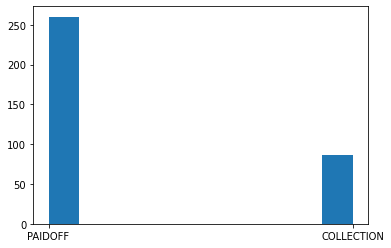

In [94]:
plt.hist(y)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [17]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [23]:
#convert category values in y to 0/1 values and store them in y_train
from sklearn.preprocessing import LabelEncoder
le_y=LabelEncoder()
le_y.fit(['PAIDOFF','COLLECTION'])
y_label=le_y.transform(y)
y_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
#split dataset to train and test set for training model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_label,test_size=0.2,random_state=3)
#print shape of each set to ensure matching dimensions
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (276, 8)
y_train shape:  (276,)
X_test shape:  (70, 8)
y_test shape:  (70,)


best K is equal to  7


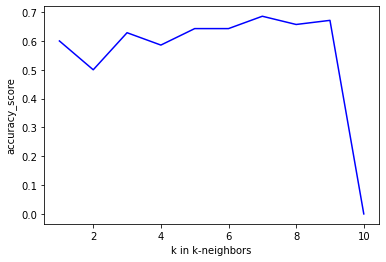

In [104]:
#Finding best K by using loops
Ks=10
mean_acc=np.zeros(Ks)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    mean_acc[i-1]=metrics.accuracy_score(y_test,neigh.predict(X_test))
best_K=mean_acc.argmax()+1
print('best K is equal to ',best_K)

#Visualization for K
plt.plot(range(1,Ks+1),mean_acc,color="blue")
plt.xlabel('k in k-neighbors')
plt.ylabel('accuracy_score')
plt.show()

In [64]:
#Finding automatically best K by using grid searching and crossing validdation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe=Pipeline([('model',KNeighborsClassifier())])
grid=GridSearchCV(estimator=pipe,
                  param_grid={'model__n_neighbors': range(1,11)},
                  cv=3 #number of crossing validation
                 )
grid.fit(X_train,y_train)
acc_score=metrics.accuracy_score(y_test,grid.predict(X_test))
print('Accuracy score: ',acc_score)

Accuracy score:  0.6857142857142857


Based on the two results in two ways, we can see that the probability that k=7 is the best k for this training dataset is very high.

In [100]:
neighbor=KNeighborsClassifier(n_neighbors=best_K).fit(X_train,y_train)
predictions=neighbor.predict(X_test)

In [72]:
def printPredict(y_test,predictions):
    print('True Label', 'Prediction')
    for i in range(len(y_test)):
        true_label='PAIDOFF' if y_test[i]==1 else 'COLLECTION'
        predictions_label='PAIDOFF' if predictions[i]==1 else 'COLLECTION'
        print(true_label , predictions_label)

In [105]:
printPredict(y_test,predictions)

True Label Prediction
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF COLLECTION
PAIDOFF COLLECTION
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION COLLECTION
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION COLLECTION
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PA

# Decision Tree


Similar to how to finding the best k above, tree height affects decision tree algorithm, so lets use loop to find minimum tree height at which model accuracy is considered good.

However, standardisation of features may affects to accuracy of DecisionTree algorithm, so let's choose feature from data frame again first

In [119]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
X_train,X_test,y_train,y_test=train_test_split(X,y_label,test_size=0.3,random_state=3)
#test size bigger than KNN situation because test set may only include members in COLLECTION class
#print shape of each set to ensure matching dimensions
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (242, 8)
y_train shape:  (242,)
X_test shape:  (104, 8)
y_test shape:  (104,)


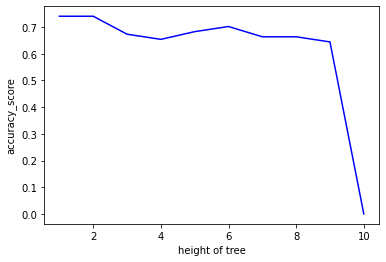

The appropriate max_depth is  1


In [120]:
num_of_max_depth=10
mean_acc=np.zeros(num_of_max_depth)
for i in range(1,num_of_max_depth):
    dtree=DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(X_train,y_train)
    mean_acc[i-1]=metrics.accuracy_score(y_test,dtree.predict(X_test))
best_max_depth=mean_acc.argmax()+1

plt.plot(range(1,Ks+1),mean_acc,color="blue")
plt.xlabel('height of tree')
plt.ylabel('accuracy_score')
plt.show()
print('The appropriate max_depth is ',best_max_depth)

In [121]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth).fit(X_train,y_train)
predictions=dtree.predict(X_test)
print('Accuracy score: ', metrics.accuracy_score(y_test,predictions))
printPredict(y_test,predictions)

Accuracy score:  0.7403846153846154
True Label Prediction
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PA

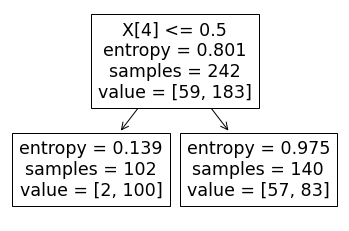

In [122]:
tree.plot_tree(dtree)
plt.show()

Based on the tree, we can see the classification results based on receiving the loan at the end of the week. However, It looks like quite bias.
Seeing the above graph, max_depth is equal to 2 is also a good choice.

In [126]:
dtree2=DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X_train,y_train)
predictions2=dtree2.predict(X_test)
print('Accuracy score: ', metrics.accuracy_score(y_test,predictions2))
printPredict(y_test,predictions2)

Accuracy score:  0.7403846153846154
True Label Prediction
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PA

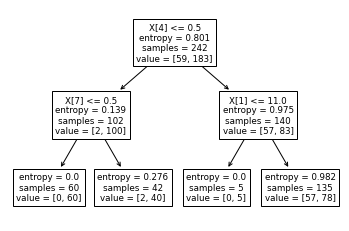

In [127]:
tree.plot_tree(dtree2)
plt.show()

# Support Vector Machine


(-0.5317783654699941, 2.7699320080680114, -0.05, 1.05)

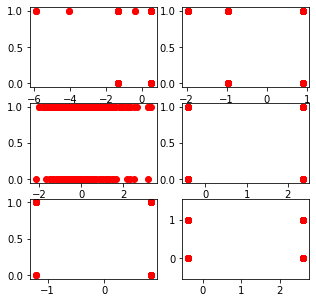

In [147]:
#plot some scatter between features and target
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(5,5))
ax[0,0].scatter(X[:,0],y_label,color="red")
ax[0,1].scatter(X[:,1],y_label,color="red")
ax[1,0].scatter(X[:,2],y_label,color="red")
ax[1,1].scatter(X[:,3],y_label,color="red")
ax[2,0].scatter(X[:,4],y_label,color="red")
ax[2,1].scatter(X[:,5],y_label,color="red")
plt.axis('equal')

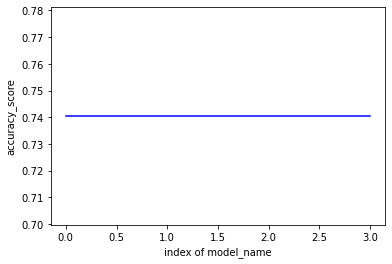

In [152]:
#Browse all models to find the best one
from sklearn import svm
model_name=['linear','poly','rbf','sigmoid']
mean_acc=np.zeros(4)
index=0
for name in model_name:
    s=svm.SVC(kernel=name).fit(X_train,y_train)
    mean_acc[index]=metrics.accuracy_score(y_test,s.predict(X_test))
    index+=1
model=model_name[mean_acc.argmax()]

plt.plot(range(0,4),mean_acc,color="blue")
plt.xlabel('index of model_name')
plt.ylabel('accuracy_score')
plt.show()

In [153]:
s=svm.SVC(kernel='rbf').fit(X_train,y_train)
predictions=s.predict(X_test)
printPredict(y_test,predictions)

True Label Prediction
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
COLLECTION PAIDOFF
COLLECTION PAIDOFF
PAIDOFF PAIDOFF
PAIDOFF PAIDOFF
PAIDOF

# Logistic Regression


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [157]:
from sklearn.metrics import classification_report,confusion_matrix
predictions=LR.predict(X_test)
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.74      1.00      0.85        77

    accuracy                           0.74       104
   macro avg       0.37      0.50      0.43       104
weighted avg       0.55      0.74      0.63       104



C:\Users\t480\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\t480\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\t480\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[77  0]
 [27  0]]


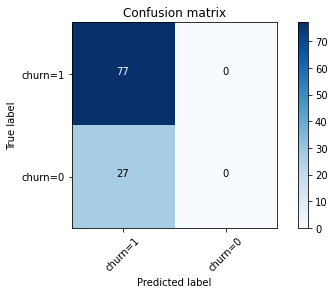

In [158]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

# Model Evaluation using Test set


In [18]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Load Test set for evaluation


In [19]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [137]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

Xt=Feature
yt=test_df['loan_status'].values
X= preprocessing.StandardScaler().fit(X).transform(X)

le_yt=LabelEncoder()
le_yt.fit(['PAIDOFF','COLLECTION'])
yt_label=le_yt.transform(yt)

In [138]:
Xt_train,Xt_test,yt_train,yt_test=train_test_split(Xt,yt_label,test_size=0.2,random_state=3)

In [160]:
algorithms=['KNN','Decision Tree','SVM','LogisticRegression']
print(algorithms[0],':')
print(' Jaccard: ',metrics.jaccard_score(yt_test,neighbor.predict(Xt_test)))
print(' F1-score: ',metrics.f1_score(yt_test,neighbor.predict(Xt_test)))
print(' LogLoss: ',metrics.log_loss(yt_test,neighbor.predict(Xt_test)))
print(algorithms[1],':')
print(' Jaccard: ',metrics.jaccard_score(yt_test,dtree2.predict(Xt_test)))
print(' F1-score: ',metrics.f1_score(yt_test,dtree2.predict(Xt_test)))
print(' LogLoss: ',metrics.log_loss(yt_test,dtree2.predict(Xt_test)))
print(algorithms[2],':')
print(' Jaccard: ',metrics.jaccard_score(yt_test,s.predict(Xt_test)))
print(' F1-score: ',metrics.f1_score(yt_test,s.predict(Xt_test)))
print(' LogLoss: ',metrics.log_loss(yt_test,s.predict(Xt_test)))
print(algorithms[3],':')
print(' Jaccard: ',metrics.jaccard_score(yt_test,LR.predict(Xt_test)))
print(' F1-score: ',metrics.f1_score(yt_test,LR.predict(Xt_test)))
print(' LogLoss: ',metrics.log_loss(yt_test,LR.predict(Xt_test)))

KNN :
 Jaccard:  0.7272727272727273
 F1-score:  0.8421052631578948
 LogLoss:  9.419884361547513
Decision Tree :
 Jaccard:  0.7272727272727273
 F1-score:  0.8421052631578948
 LogLoss:  9.419884361547513
SVM :
 Jaccard:  0.7272727272727273
 F1-score:  0.8421052631578948
 LogLoss:  9.419884361547513
LogisticRegression :
 Jaccard:  0.7272727272727273
 F1-score:  0.8421052631578948
 LogLoss:  9.419884361547513


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.7272  | 0.8421   | 9.4199  |
| Decision Tree      | 0.7272  | 0.8421   | 9.4199  |
| SVM                | 0.7272  | 0.8421   | 9.4199  |
| LogisticRegression | 0.7272  | 0.8421   | 9.4199  |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
